## Normal Distribution

$$
  f(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

In [10]:
# The normal distribution function
def normal_distribution(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

$$
  F(x; \mu, \sigma) = \int_{-\infty}^{x} f(x; \mu, \sigma) dt
$$

In [11]:
# The CDF for a normal distribution can be computed by integrating the PDF.
# Since we don't have an analytical form for the integral of the normal distribution's PDF,
# we'll approximate the CDF by summing up the area under the curve incrementally.
def cdf_normal_distribution(x_points, mu, sigma):
    # Calculate the PDF for each x value
    pdf_values = normal_distribution(x_points, mu, sigma)
    # Approximate the CDF by cumulatively summing the PDF values and multiplying by the step size
    dx = x_points[1] - x_points[0]  # Assumption: x_points are equally spaced
    cdf_values = np.cumsum(pdf_values) * dx
    return cdf_values

In [12]:
# Parameters for the normal distribution
mu = 0     # mean
sigma = 1  # standard deviation

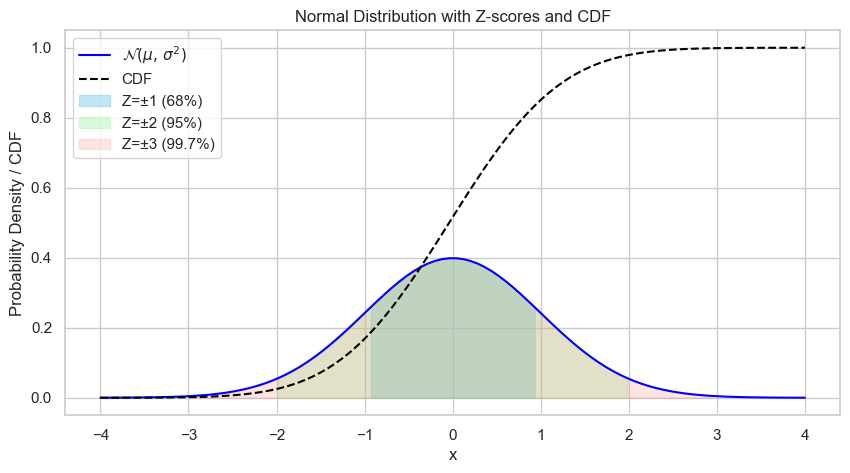

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a range of x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# Calculate the y values based on the normal distribution function
y = normal_distribution(x, mu, sigma)

# Calculate the CDF values using our function
cdf_y = cdf_normal_distribution(x, mu, sigma)

# Plot the normal distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='$\mathcal{N}(\mu,\,\sigma^{2})$', color='blue')

# Fill the areas for Z-scores of 1, 2, and 3
plt.fill_between(x, y, where=(x >= mu - sigma) & (x <= mu + sigma), color='skyblue', alpha=0.5, label='Z=±1 (68%)')
plt.fill_between(x, y, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='lightgreen', alpha=0.3, label='Z=±2 (95%)')
plt.fill_between(x, y, where=(x >= mu - 3*sigma) & (x <= mu + 3*sigma), color='salmon', alpha=0.2, label='Z=±3 (99.7%)')

# Overlay the CDF
plt.plot(x, cdf_y, label='CDF', color='black', linestyle='--')

plt.title('Normal Distribution with Z-scores and CDF')
plt.xlabel('x')
plt.ylabel('Probability Density / CDF')
plt.legend()
plt.show()

## Binomial Distribution

$$
  P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

In [21]:
from scipy.special import comb

# The binomial distribution function
def binomial_distribution(k, n, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

In [22]:
# Define the parameters for the binomial distribution
n = 10  # number of trials
p = 0.5  # probability of success

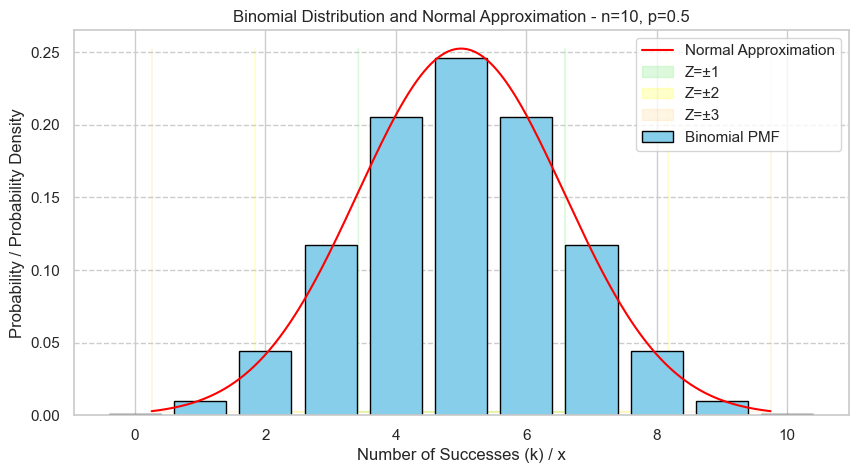

In [26]:
# Define the range of k values (number of successes)
k_values = np.arange(0, n+1)

# Calculate the y values based on the normal distribution function
pmf_binomial = binomial_distribution(k_values, n, p)

# Calculate the mean and standard deviation for the binomial distribution
mu_binomial = n * p
sigma_binomial = np.sqrt(n * p * (1 - p))

# Calculate X values for Z-scores of ±1, ±2, and ±3 using the mean and standard deviation
x_z1 = [mu_binomial - sigma_binomial, mu_binomial + sigma_binomial]
x_z2 = [mu_binomial - 2*sigma_binomial, mu_binomial + 2*sigma_binomial]
x_z3 = [mu_binomial - 3*sigma_binomial, mu_binomial + 3*sigma_binomial]

# Generate x values for the normal distribution approximation
x_normal = np.linspace(mu_binomial - 3*sigma_binomial, mu_binomial + 3*sigma_binomial, 1000)

# Calculate the PDF of the normal distribution approximation
y_normal = normal_distribution(x_normal, mu_binomial, sigma_binomial)

# Plot the binomial distribution
plt.figure(figsize=(10, 5))
plt.bar(k_values, pmf_binomial, color='skyblue', edgecolor='black', label='Binomial PMF')

# Overlay the normal distribution approximation
plt.plot(x_normal, y_normal, color='red', label='Normal Approximation')

# Highlight Z-score ranges on the binomial distribution
plt.fill_betweenx(y_normal, x_z1[0], x_z1[1], color='lightgreen', alpha=0.3, label='Z=±1')
plt.fill_betweenx(y_normal, x_z2[0], x_z2[1], color='yellow', alpha=0.2, label='Z=±2')
plt.fill_betweenx(y_normal, x_z3[0], x_z3[1], color='orange', alpha=0.1, label='Z=±3')

plt.title('Binomial Distribution and Normal Approximation - n=10, p=0.5')
plt.xlabel('Number of Successes (k) / x')
plt.ylabel('Probability / Probability Density')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()